In [1]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
f=pd.read_csv('yapay_zeka_egitim seti.csv')
staatistik=f.describe()
print(staatistik)

              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

In [3]:
#Eksik verilerin kotnrol edilmesi
bosVeri=f.isnull().sum()#Boş veri var mı kontrol edilir, toplamı ne kadardır sorusuna cevap verir
print(bosVeri)

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


In [4]:
# Kullanılacak özelliklerin seçilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

f = pd.read_csv('Testdatensatz.csv')

print(f.info())
print(f.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [5]:
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('Testdatensatz.csv')#Eğitimde kullanılacak veri seti.
featurelar=['product_id', 'month_year', 'qty', 'total_price']#Model eğitiminde kullanılmayacak sütun isimleri
X=df.drop(columns=featurelar)
y=df['qty']#Sonuç değişkeni
label_encoder=LabelEncoder()#Encoder
if 'product_category_name' in X.columns:
    X['product_category_name'] = label_encoder.fit_transform(X['product_category_name'])#Metin tabanlı verinin sayısal işlenmesi
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#Eğitim ve test verilerinin ayarlanması.
rfModel=RandomForestRegressor(n_estimators=10, random_state=42)#Kaç ağaçtan oluşacağı.
rfModel.fit(X_egitim, y_egitim)#Eğitime sokulması.
y_tahmin=rfModel.predict(X_test)#tahmin
print(y_tahmin)

[25.1 10.5 14.8 33.2 19.3 10.4 14.4 67.8 12.2  5.6  7.9 19.4 10.8  1.6
  6.7 64.8 13.6 29.5 22.2  2.5 18.8 19.5  9.3 28.3 60.9  5.1  1.7  6.5
  1.9  8.  10.3 12.   9.9 22.5 11.4  5.  17.1  6.7  8.   1.9  6.1 12.2
  5.  39.8  8.5 30.9 17.2  1.6  7.8  9.1 13.7  6.5 23.4 10.8  6.3 19.3
 28.6  5.9 11.1  1.8 10.   2.   6.8 16.9  4.6  9.  15.8 24.5 21.2  9.1
 31.9 14.1  8.5 11.4 12.3 19.   9.5  5.6 12.1 14.3 21.7  8.4  5.9  4.4
 28.9 22.6  2.2  2.4 19.5 12.7 26.8  7.7 12.3  7.5  7.3  3.9 26.8 23.
  2.2  6.  16.9 10.   4.2 22.3  9.9  4.5 47.2  9.1 23.7 15.   6.6 22.6
  8.8  6.  12.6 15.5  7.8 30.4 19.3  9.8  8.5  2.7  2.8 16.3  7.2 21.8
 20.5  4.6 17.2  8.9 14.8 23.   8.6 27.5 18.5 11.1]


In [6]:
r2=r2_score(y_test, y_tahmin)#Skor tahmini.
hata=np.sqrt(mean_squared_error(y_test, y_tahmin))#Ortalama hata.
print("Ortalama Hata Payı:", hata)
print("Modelin tahmin başarısı: ","%",r2*100)


Ortalama Hata Payı: 8.98753630443457
Modelin tahmin başarısı:  % 70.20374216891354


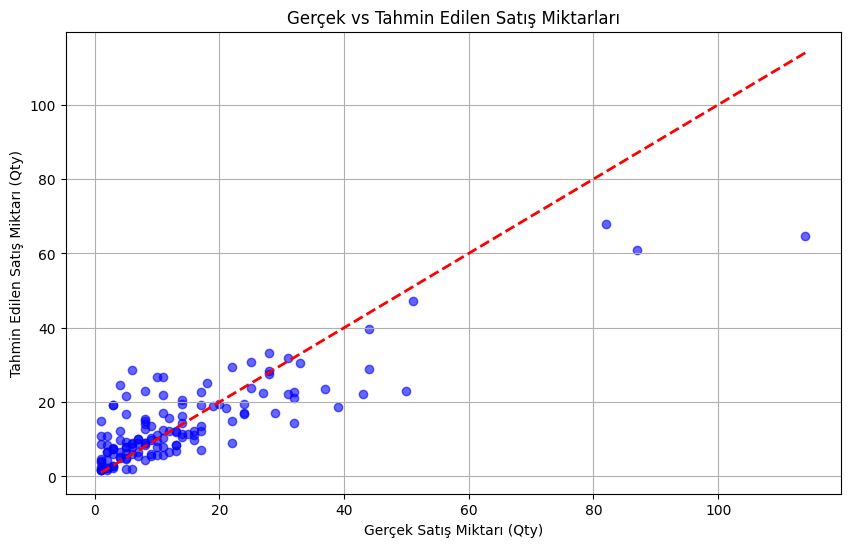

In [7]:
#Model Tahmininin Görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_tahmin, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Satış Miktarı (Qty)')
plt.ylabel('Tahmin Edilen Satış Miktarı (Qty)')
plt.title('Gerçek vs Tahmin Edilen Satış Miktarları')
plt.grid(True)
plt.savefig('tahmin_ve_gerceklesen.png')

In [8]:
import joblib
joblib.dump(rfModel,'model.pkl')

['model.pkl']

In [9]:
from sklearn.preprocessing import LabelEncoder
import joblib as jb
#Metin tabanlı verinin sayısal verilere dönüştürme modelinin kaydedilmesi.
f=pd.read_csv('Testdatensatz.csv')
le = LabelEncoder()
le.fit(f['product_category_name'])
joblib.dump(le,'le.pkl')


['le.pkl']

In [10]:
import joblib
import pandas as pd
df=pd.read_csv(r'Test.csv')
model=joblib.load('model.pkl')
kodlayici=joblib.load('le.pkl')
girdi_sutunlari={
    'product_category_name':None,
    'unit_price':None,
    'freight_price':None ,
    'product_score':None ,
    'customers':None ,
    'product_description_lenght':None,
    'product_name_lenght':None,
    'product_photos_qty': None,
    'product_weight_g':None ,
    'product_score':None ,
    'customers': None,
    'weekday': None,
    'weekend': None,
    'holiday':None ,
    'month': None,
    'year': None,
    's':None ,
    'volume': None,
    'comp_1':None , 'ps1':None , 'fp1':None ,
    'comp_2': None, 'ps2': None, 'fp2':None ,
    'comp_3':None , 'ps3': None, 'fp3':None ,
    'lag_price':None
}
for index, row in df.iterrows():
    test_eslesme=girdi_sutunlari.copy()
    csv_satir = row.to_dict()
    test_eslesme.update(csv_satir)

tahmin=pd.DataFrame([test_eslesme])

tahmin['product_category_name']=kodlayici.transform(tahmin['product_category_name'])
tahmin = tahmin[model.feature_names_in_]

sonuc=model.predict(tahmin)[0]

print("monatlicher Verkaufsbetrag: ", sonuc)#test verisindeki iki sutün ile ilgili tahmin sonucu


monatlicher Verkaufsbetrag:  8.9
